In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-dataset/Dataset bank .csv
/kaggle/input/bank-dataset/DATA Emitten bank .csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/bank-dataset/Dataset bank .csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  20 non-null     object 
 1   DER                      20 non-null     float64
 2   Operating Profit Margin  20 non-null     float64
 3   ROA                      20 non-null     float64
 4   Sales Growth             20 non-null     float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [4]:
df0.describe()

,DER,Operating Profit Margin,ROA,Sales Growth,Category
count,20.000000,2.000000e+01,20.000000,20.000000,0.0
mean,45.523000,2.678984e+05,0.000500,0.919885,NaN
std,175.267747,1.196657e+06,0.029285,3.946276,NaN
min,0.490000,1.225807e-01,-0.090000,-9.000000,NaN
25%,4.312500,2.124689e+01,-0.012500,-1.730518,NaN
50%,5.280000,8.733276e+01,0.010000,1.255745,NaN
75%,8.822500,3.722246e+02,0.010000,4.245327,NaN
max,790.000000,5.351928e+06,0.040000,6.531747,NaN


In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

<Figure size 1080x1080 with 0 Axes>

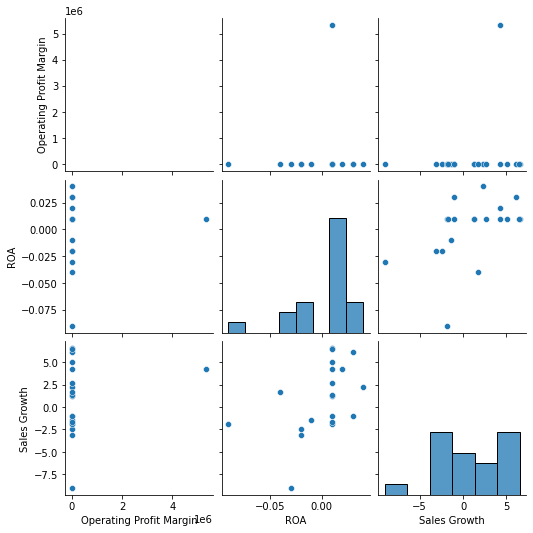

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

In [7]:
df0 = pd.read_csv('../input/bank-dataset/Dataset bank .csv')
df1 = df0[['DER','Operating Profit Margin' ,'ROA','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,ROA,Sales Growth,Category
count,20.000000,2.000000e+01,20.000000,20.000000,0.0
mean,45.523000,2.678984e+05,0.000500,0.919885,NaN
std,175.267747,1.196657e+06,0.029285,3.946276,NaN
min,0.490000,1.225807e-01,-0.090000,-9.000000,NaN
25%,4.312500,2.124689e+01,-0.012500,-1.730518,NaN
50%,5.280000,8.733276e+01,0.010000,1.255745,NaN
75%,8.822500,3.722246e+02,0.010000,4.245327,NaN
max,790.000000,5.351928e+06,0.040000,6.531747,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

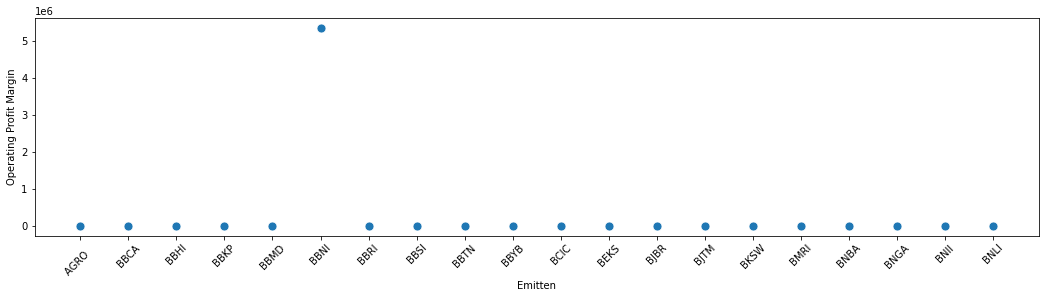

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

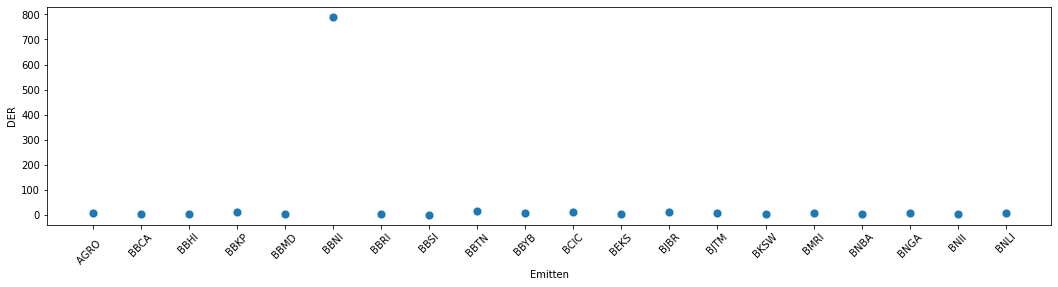

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

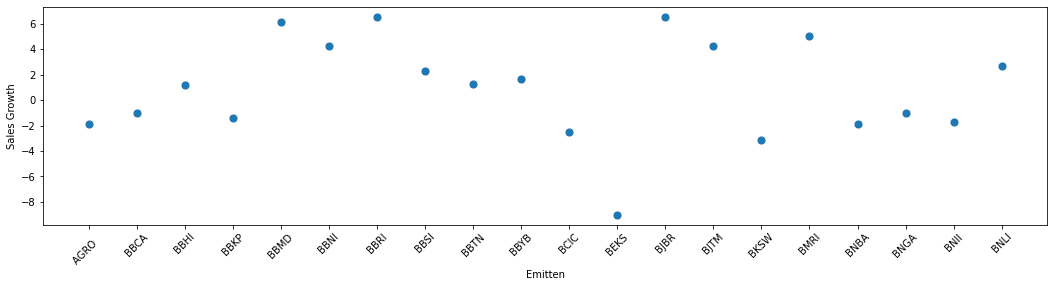

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 20
Jumlah baris setelah memfilter outlier: 19


In [12]:
df1.describe()

,DER,Operating Profit Margin,ROA,Sales Growth,Category
count,19.000000,19.000000,1.900000e+01,19.000000,0.0
mean,6.340000,317.852923,1.826025e-19,0.744804,NaN
std,3.651753,549.402655,3.000000e-02,3.973807,NaN
min,0.490000,0.122581,-9.000000e-02,-9.000000,NaN
25%,4.265000,20.077850,-1.500000e-02,-1.770453,NaN
50%,5.070000,64.463265,1.000000e-02,1.218580,NaN
75%,7.785000,239.000004,1.000000e-02,3.457530,NaN
max,15.820000,2143.120250,4.000000e-02,6.531747,NaN


In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,1.900000e+01,1.900000e+01,1.900000e+01
mean,-1.869849e-16,2.921640e-17,-6.135443e-17
std,1.027402e+00,1.027402e+00,1.027402e+00
min,-1.645868e+00,-5.941669e-01,-2.519457e+00
25%,-5.837908e-01,-5.568499e-01,-6.503036e-01
50%,-3.573081e-01,-4.738476e-01,1.224916e-01
75%,4.065435e-01,-1.474577e-01,7.013578e-01
max,2.667150e+00,3.413314e+00,1.496177e+00


In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(20, 6)

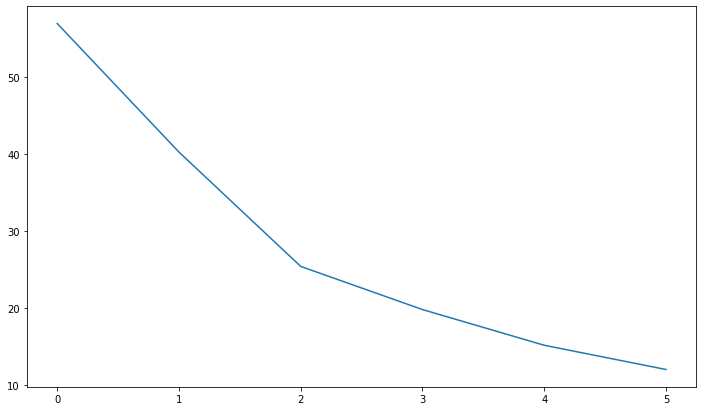

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 7):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 7))
plt.plot(inertia) #Elbow Method

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=2, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

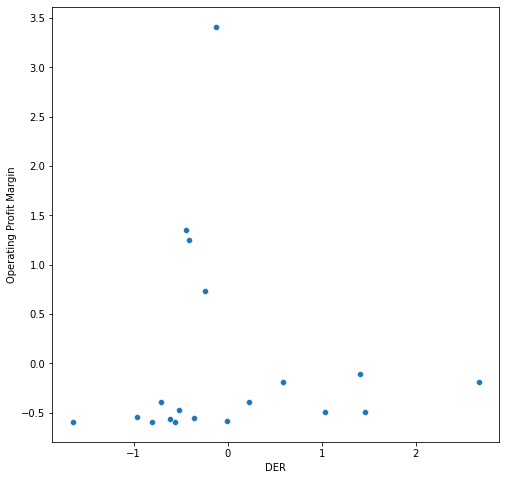

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
 new_df.head(20)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,0.227889,-0.387733,-0.670953,NaN,0
1,-0.410764,1.246771,-0.451108,NaN,0
2,-0.557063,-0.594167,0.122492,NaN,0
3,1.038163,-0.487989,-0.566354,NaN,0
4,-0.967827,-0.547641,1.398654,NaN,0
5,-0.438898,1.356501,1.496177,NaN,1
6,-1.645868,-0.593893,0.390619,NaN,0
7,2.667150,-0.185873,0.141709,NaN,1
8,-0.008440,-0.587060,0.240168,NaN,0
9,1.460180,-0.496569,-0.832537,NaN,0


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(20)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,0.227889,-0.387733,-0.670953,NaN,0
1,2,-0.410764,1.246771,-0.451108,NaN,0
2,2,-0.557063,-0.594167,0.122492,NaN,0
3,2,1.038163,-0.487989,-0.566354,NaN,0
4,2,-0.967827,-0.547641,1.398654,NaN,0
5,4,-0.438898,1.356501,1.496177,NaN,1
6,2,-1.645868,-0.593893,0.390619,NaN,0
7,4,2.667150,-0.185873,0.141709,NaN,1
8,2,-0.008440,-0.587060,0.240168,NaN,0
9,2,1.460180,-0.496569,-0.832537,NaN,0


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       19 non-null     int64  
 1   DER (St.)                      19 non-null     float64
 2   Operating Profit Margin (St.)  19 non-null     float64
 3   Sales Growth (St.)             19 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 736.0 bytes


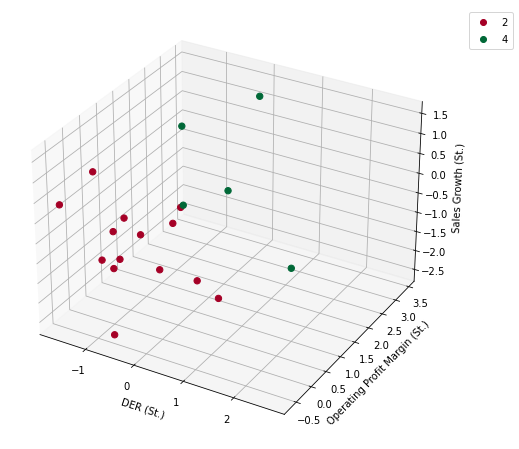

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

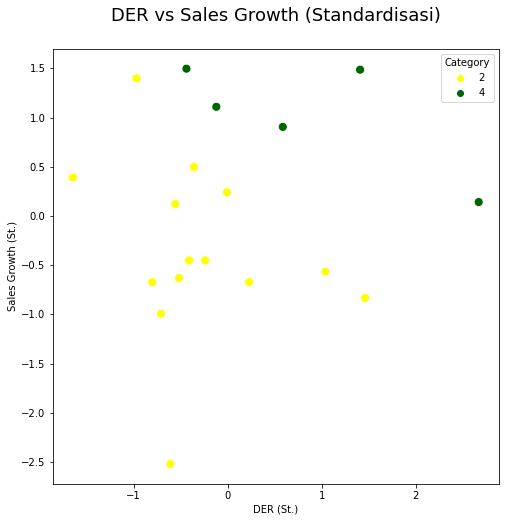

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

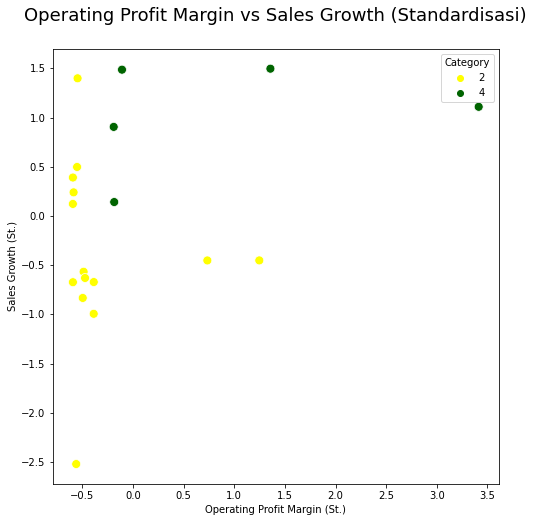

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

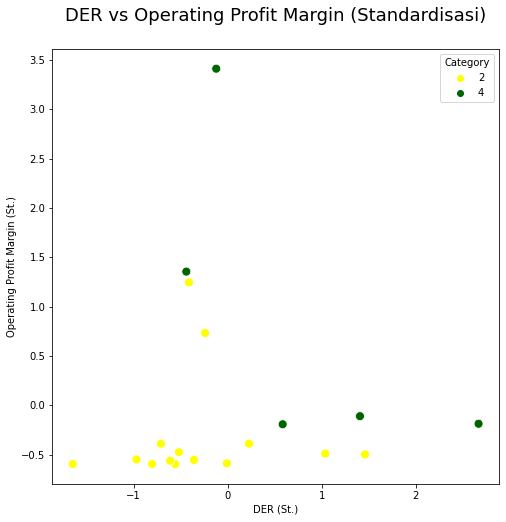

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [27]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [28]:
dftemp = pd.read_csv('../input/bank-dataset/DATA Emitten bank .csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(20)

,Emitten;Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,ROA,Sales Growth
0,AGRO;PT Bank Rakyat Indonesia Agroniaga Tbk,2.0,0.227889,-0.387733,-0.670953,AGRO,7.15,1.105130e+02,-0.09,-1.850321
1,BBCA;PT Bank Central Asia Tbk,2.0,-0.410764,1.246771,-0.451108,BBCA,4.88,9.845626e+02,0.03,-1.000000
2,BBHI;PT Bank Harda Internasional Tbk,2.0,-0.557063,-0.594167,0.122492,BBHI,4.36,1.225807e-01,0.01,1.218580
3,BBKP;Bank Bukopin Tbk,2.0,1.038163,-0.487989,-0.566354,BBKP,10.03,5.690090e+01,-0.01,-1.445750
4,BBMD;PT Bank Mestika Dharma Tbk,2.0,-0.967827,-0.547641,1.398654,BBMD,2.90,2.500228e+01,0.03,6.154548
5,BBNI;PT Bank Negara Indonesia (Persero) Tbk,4.0,-0.438898,1.356501,1.496177,BBNI,790.00,5.351928e+06,0.01,4.246426
6,BBRI;PT Bank Rakyat Indonesia (Persero) Tbk,2.0,-1.645868,-0.593893,0.390619,BBRI,4.78,1.043241e+03,0.01,6.531747
7,BBSI;PT Bank Bisnis Internasional Tbk,4.0,2.667150,-0.185873,0.141709,BBSI,0.49,2.690269e-01,0.04,2.255647
8,BBTN;PT Bank Tabungan Negara (Persero) Tbk,2.0,-0.008440,-0.587060,0.240168,BBTN,15.82,2.184574e+02,0.01,1.292910
9,BBYB;PT Bank Neo Commerce Tbk,2.0,1.460180,-0.496569,-0.832537,BBYB,6.31,3.922799e+00,-0.04,1.673732


In [29]:
df.to_csv('result.csv', index = False)

In [30]:
kmeans.cluster_centers_

array([[-0.29279973, -0.30600201, -0.3669932 ],
       [ 0.81983924,  0.85680562,  1.02758097]])

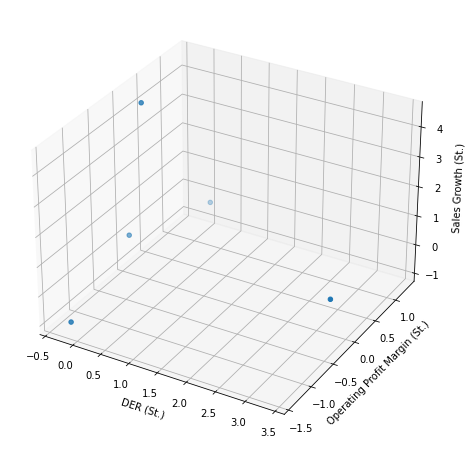

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

In [32]:
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000
mean,4.0,0.819839,0.856806,1.027581,161.964000,1.070463e+06,0.002000,0.179391
std,0.0,1.253157,1.573460,0.555932,351.105088,2.393412e+06,0.027749,6.239203
min,4.0,-0.438898,-0.190872,0.141709,0.490000,2.690269e-01,-0.030000,-9.000000
25%,4.0,-0.120978,-0.185873,0.904943,3.820000,1.773977e+01,-0.020000,-3.097810
50%,4.0,0.585198,-0.109042,1.108997,4.170000,1.102022e+02,0.010000,2.255647
75%,4.0,1.406725,1.356501,1.486079,11.340000,2.595427e+02,0.010000,4.246426
max,4.0,2.667150,3.413314,1.496177,790.000000,5.351928e+06,0.040000,6.492690


In [33]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.0,-0.292800,-0.306002,-0.366993,6.826429,402.073993,-0.000714,1.059333
std,0.0,0.792147,0.562645,0.902926,3.560770,620.740563,0.031736,3.211770
min,2.0,-1.645868,-0.594167,-2.519457,2.900000,0.122581,-0.090000,-2.475300
25%,2.0,-0.684372,-0.580601,-0.672136,4.570000,31.829996,-0.005000,-1.629376
50%,2.0,-0.464219,-0.522105,-0.508944,5.700000,87.488108,0.010000,0.109290
75%,2.0,-0.066116,-0.409697,0.210749,8.102500,587.317242,0.010000,3.602153
max,2.0,1.460180,1.246771,1.398654,15.820000,2143.120250,0.030000,6.531747


In [35]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
